In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('Data_Position_Salary (1).csv')

In [13]:
def cleanData(sal):
    if isinstance(sal, int):
        return sal
    sal = sal.replace(',','')
    sal = sal.replace('$','')
    sal = sal.replace(' ','')
    val = int(float(sal))
    return val

In [14]:
df['SalaryUSD'] = df['SalaryUSD'].apply(cleanData)

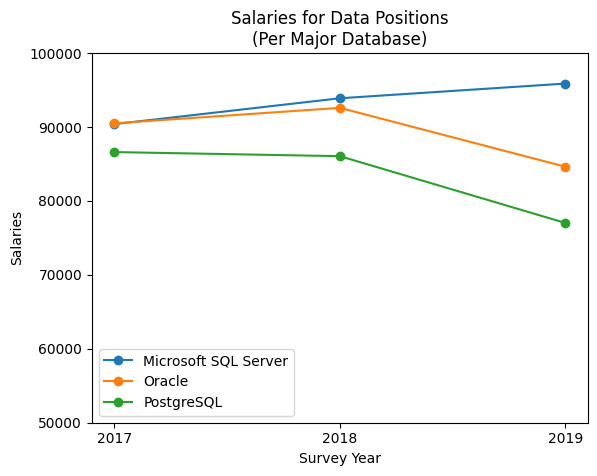

In [22]:
fig, axes = plt.subplots(1,1)

df1 = df.copy()

df_databases = df1[df1['PrimaryDatabase'] == "Microsoft SQL Server"]
df1_databases = df1[df1['PrimaryDatabase'] == "Oracle"]
df2_databases = df1[df1['PrimaryDatabase'] == "PostgreSQL"]

df_group = df_databases.groupby('Survey Year')['SalaryUSD']
df1_group = df1_databases.groupby('Survey Year')['SalaryUSD']
df2_group = df2_databases.groupby('Survey Year')['SalaryUSD']

df_mean = df_group.mean()
df1_mean = df1_group.mean()
df2_mean = df2_group.mean()


axes.set_title('Salaries for Data Positions\n(Per Major Database)')
axes.set_xticks([2017, 2018, 2019])
axes.set_ylim(ymin=50000, ymax=100000)
axes.set_ylabel('Salaries')

df_mean.plot(marker='o', label='Microsoft SQL Server')
df1_mean.plot(marker='o', label='Oracle')
df2_mean.plot(marker='o', label='PostgreSQL')
axes.legend()
plt.show()

In [25]:
df3 = df[df['PrimaryDatabase'].isin(['Microsoft SQL Server', 'Oracle','PostgreSQL'])].copy()

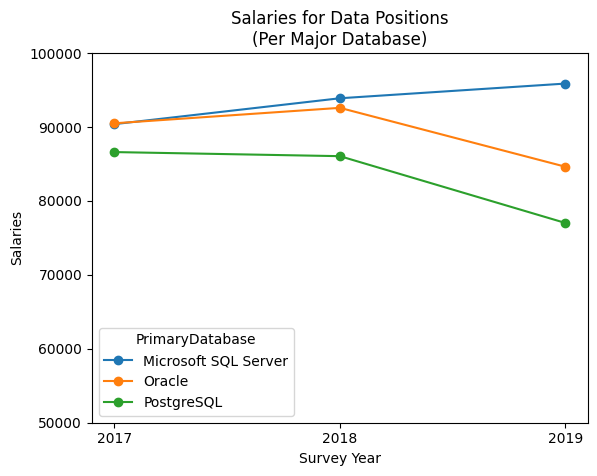

In [29]:
fig, axs = plt.subplots(1,1) 
df_pivot = df3.pivot_table(values = 'SalaryUSD',index = 'Survey Year', columns='PrimaryDatabase') 
df_pivot.plot(ax=axs, marker="o") 
axs.set_xticks([2017,2018,2019]) 
axs.set_ylim(50000,100000) 
axs.set_title('Salaries for Data Positions\n(Per Major Database)') 
axs.set_ylabel('Salaries') 
plt.show()

In [30]:
df4 = df[df['PrimaryDatabase'].isin(['Microsoft SQL Server', 'Oracle','PostgreSQL'])]

/tmp/ipykernel_174601/1554676746.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_unstack = df4.groupby(['Survey Year','PrimaryDatabase']).mean()['SalaryUSD']


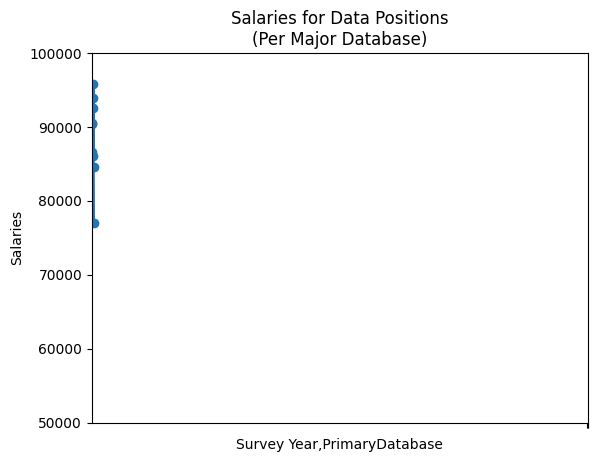

In [31]:
fig, axs = plt.subplots(1,1) 
df_unstack = df4.groupby(['Survey Year','PrimaryDatabase']).mean()['SalaryUSD']
df_unstack.plot(ax=axs, marker="o")
axs.set_xticks([2017,2018,2019])
axs.set_ylim(50000, 100000)
axs.set_title('Salaries for Data Positions\n(Per Major Database)')
axs.set_ylabel('Salaries')
plt.show()

In [33]:
dfgrp = df.groupby('Country')['SalaryUSD']

In [34]:
for group, data in dfgrp:
    print('group: {} mean: {:.1f} '.format(group, data.mean()))

group: Albania mean: 12000.0 
group: Argentina mean: 24468.2 
group: Australia mean: 92893.3 
group: Austria mean: 60972.5 
group: Bahrain mean: 70000.0 
group: Belarus mean: 64400.0 
group: Belgium mean: 64476.6 
group: Bermuda mean: 120000.0 
group: Bolivia mean: 60000.0 
group: Brazil mean: 28619.6 
group: Bulgaria mean: 35438.5 
group: Canada mean: 74856.3 
group: Cayman Islands mean: 100588.0 
group: China mean: 46000.0 
group: Colombia mean: 17667.0 
group: Costa Rica mean: 49400.0 
group: Croatia mean: 23150.0 
group: Czech Republic mean: 43494.7 
group: Denmark mean: 100890.1 
group: Dominican Republic mean: 22350.0 
group: Ecuador mean: 28000.0 
group: El Salvador mean: 26500.0 
group: Estonia mean: 63000.0 
group: Finland mean: 66605.3 
group: France mean: 57113.0 
group: Germany mean: 83695.9 
group: Ghana mean: 7500.0 
group: Greece mean: 38638.8 
group: Guatemala mean: 35100.0 
group: Guernsey mean: 65118.8 
group: Hong Kong mean: 179644.5 
group: Hungary mean: 35006.7 
gr

In [35]:
df_top10 = dfgrp.mean().sort_values().tail(n=10)
df_top10

Country
New Zealand        94279.413793
Norway             95502.260870
Israel             96710.272727
Cayman Islands    100588.000000
Denmark           100890.134615
United States     107517.140608
Uganda            114500.000000
Bermuda           120000.000000
Switzerland       128915.931818
Hong Kong         179644.500000
Name: SalaryUSD, dtype: float64

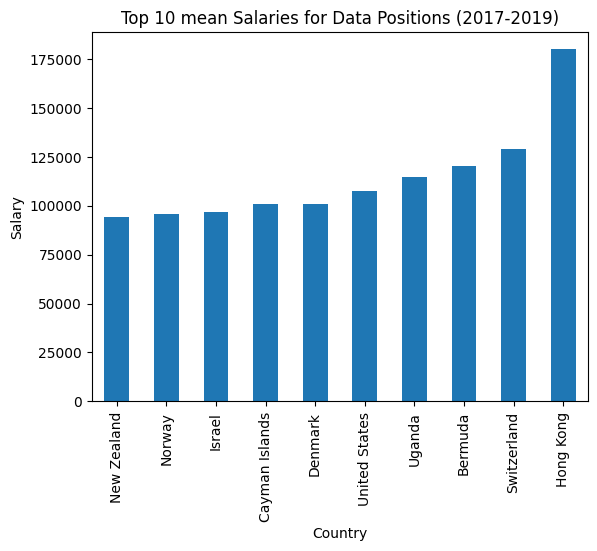

In [36]:
fig, axs= plt.subplots(1,1)
df_top10.plot(kind='bar', x='Country', y='SalaryUSD')
axs.set_title('Top 10 mean Salaries for Data Positions (2017-2019)')
axs.set_ylabel('Salary')
plt.show()

In [37]:
df['PrimaryDatabase'].unique()

array(['Microsoft SQL Server', 'Azure SQL DB', 'MongoDB', 'PostgreSQL',
       'Oracle', 'Other', 'SAP', 'Microsoft Access', 'DB2',
       'MySQL/MariaDB', 'Teradata', 'Amazon RDS (any flavor)',
       'Elasticsearch', 'Cassandra', 'SQLite'], dtype=object)

In [40]:
df1 = df.copy()
df1 = df1[df1['PrimaryDatabase']!='Microsoft SQL Server']
df1 = df1[df1['PrimaryDatabase']!='Oracle']
df1 = df1[df1['PrimaryDatabase']!='Other']

In [41]:
df1grp = df1.groupby('PrimaryDatabase')
dbcounts = df1grp['PrimaryDatabase'].count()
dbcounts

PrimaryDatabase
Amazon RDS (any flavor)    13
Azure SQL DB               24
Cassandra                   2
DB2                        16
Elasticsearch               2
Microsoft Access           15
MongoDB                     6
MySQL/MariaDB              29
PostgreSQL                 46
SAP                        11
SQLite                      4
Teradata                   11
Name: PrimaryDatabase, dtype: int64

In [42]:
minordbs = dbcounts.sort_values().tail(n=4)
minordbs

PrimaryDatabase
DB2              16
Azure SQL DB     24
MySQL/MariaDB    29
PostgreSQL       46
Name: PrimaryDatabase, dtype: int64

In [44]:
df_minordbs = df1[df1['PrimaryDatabase'].isin(minordbs.keys())]

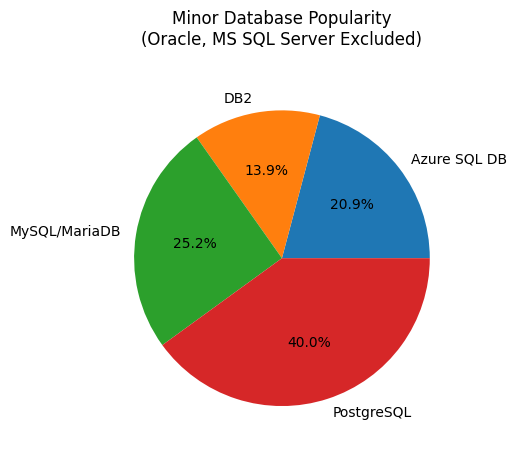

In [48]:
fig, axs = plt.subplots()
minorcounts = df_minordbs.groupby('PrimaryDatabase')['PrimaryDatabase'].count()
minorcounts.plot(kind='pie',autopct="%.1f%%")
axs.set_ylabel('')
axs.set_title('Minor Database Popularity\n(Oracle, MS SQL Server Excluded)\n')
plt.show()